# Import libraries

In [164]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import dataset

In [153]:
# Dataset path
dataset_path = "./dataset/dataset_train.csv"

dataset = pd.read_csv(dataset_path)

dataset.sample(10)


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
250868,37440,2017-07-05 09:22,288274,H,405490,60305,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
455460,462405,2017-07-07 20:19,159549,D,98970,6970,4,NaN,3.0,Male,3.0,3.0,4.0,0,0
258537,160461,2017-07-05 11:07,376391,H,105960,11085,5,270915.0,4.0,Male,4.0,2.0,NaN,0,0
419834,367974,2017-07-07 10:03,382550,C,359520,13787,4,NaN,2.0,Male,2.0,3.0,2.0,1,0
115108,287530,2017-07-03 11:52,628592,C,405490,60305,2,NaN,5.0,Male,5.0,3.0,NaN,0,1
68332,41166,2017-07-02 20:15,798559,H,82320,1734,1,146115.0,1.0,Male,1.0,3.0,3.0,0,0
341116,526721,2017-07-06 11:10,779598,A,105960,11085,2,NaN,3.0,Male,3.0,3.0,4.0,0,0
352163,76543,2017-07-06 13:37,624420,C,405490,60305,3,NaN,3.0,Male,3.0,3.0,2.0,0,0
237805,390082,2017-07-05 05:48,343610,C,414149,45962,5,254132.0,2.0,Male,2.0,2.0,NaN,0,0
426347,573189,2017-07-07 11:08,1036214,H,118601,28529,5,82527.0,8.0,Female,2.0,3.0,3.0,0,0


In [154]:
# Dataset column parameters
print(dataset.dtypes)

session_id                  int64
DateTime                   object
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
product_category_2        float64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object


In [155]:
def most_repeated_value_np(arr):
    counts = np.bincount(arr)
    most_common = np.argmax(counts)
    count = counts[most_common]
    return most_common, count

def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return ''

# Parameters

## AD PARAMETERS

In [156]:
## Session ID

## Campaign ID

## Webpage ID

## User ID

## User Group ID

## Variable 1

## PRODUCT PARAMETERS


*** Printing Nan counts for PRODUCT PARAMETERS:
NaN counts for 'product':  0
NaN counts for 'product_category_1':  0
NaN counts for 'product_category_2':  365854

*** Printing value counts for PRODUCT PARAMETERS:
Value counts: product
C    163501
H    109574
I     63711
D     41064
B     22479
E     21452
A     15391
J      9698
G      9414
F      7007
Name: count, dtype: int64

Value counts: product_category_1
4    133290
3    113812
1     81141
2     69183
5     65865
Name: count, dtype: int64

Value counts: product_category_2
82527.0     35531
146115.0    25224
270915.0    19624
254132.0    12502
143597.0     2701
269093.0      858
32026.0       578
18595.0        76
408790.0       67
255689.0       62
419804.0       43
372532.0       41
66101.0        34
234846.0       25
235358.0       19
450184.0       14
408831.0       12
327439.0        8
300711.0        4
447834.0        3
168114.0        2
99226.0         2
202351.0        1
301147.0        1
270147.0        1
181650.0      

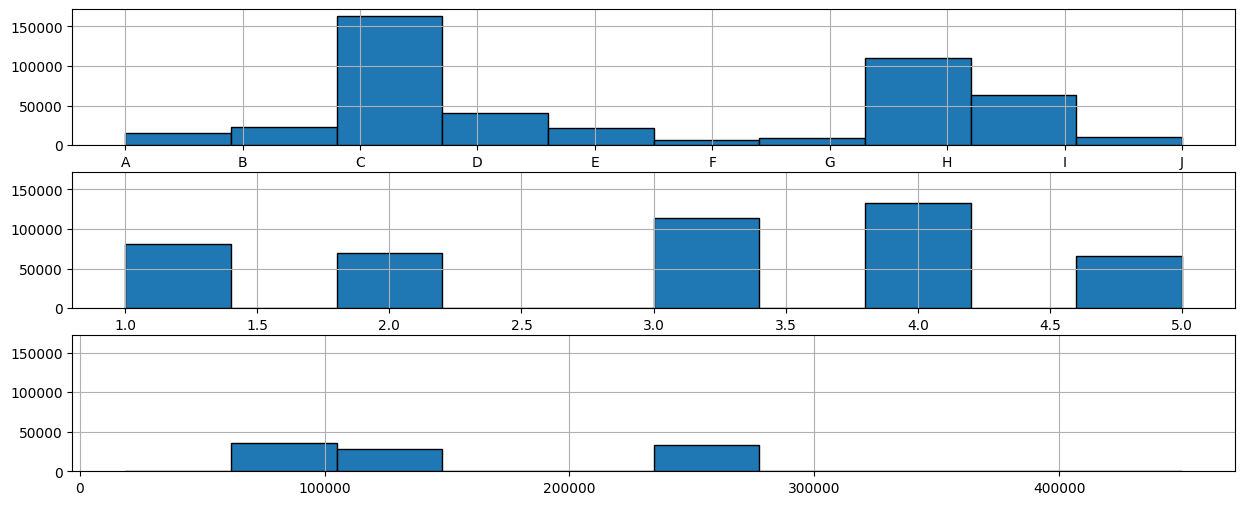

In [157]:
parameters = ["product", "product_category_1", "product_category_2"]
num_parameter = len(parameters)

print("\n*** Printing Nan counts for PRODUCT PARAMETERS:")
for i in range(num_parameter):
    print(f"NaN counts for '{parameters[i]}': ", dataset[parameters[i]].isna().sum())

## Product
print("\n*** Printing value counts for PRODUCT PARAMETERS:")
for i in range(num_parameter):
    value_counts = dataset[parameters[i]].value_counts()
    print(f"Value counts: {value_counts}\n")
    
## Plot Histogram
fig, axs = plt.subplots(num_parameter, 1, figsize=(15, 2*num_parameter), sharey=True)
for i in range(num_parameter):
    dataset[parameters[i]].sort_values().hist(ax=axs[i], edgecolor='black')


## USER PARAMETERS


*** Printing Nan counts for PRODUCT PARAMETERS:
NaN counts for 'gender':  18243
NaN counts for 'age_level':  18243
NaN counts for 'user_depth':  18243
NaN counts for 'city_development_index':  125129

*** Printing value counts for PRODUCT PARAMETERS:
Value counts: gender
Male      393454
Female     51594
Name: count, dtype: int64

Value counts: age_level
3    160581
2    143501
4     63859
1     43367
5     30828
6      2759
0       153
Name: count, dtype: Int64

Value counts: user_depth
3    402798
2     30389
1     11861
Name: count, dtype: Int64

Value counts: city_development_index
2    147643
3     88709
4     67166
1     34644
Name: count, dtype: Int64



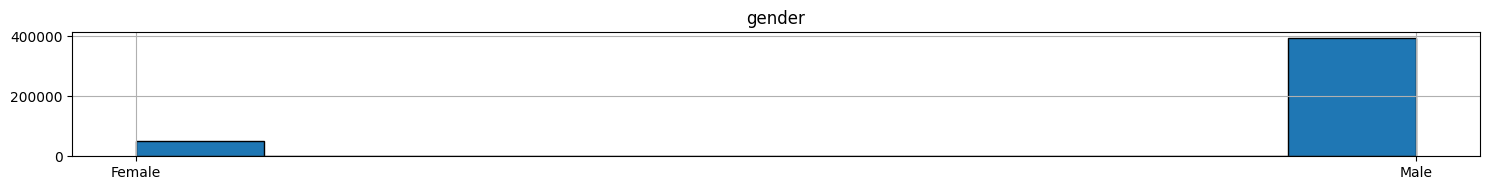

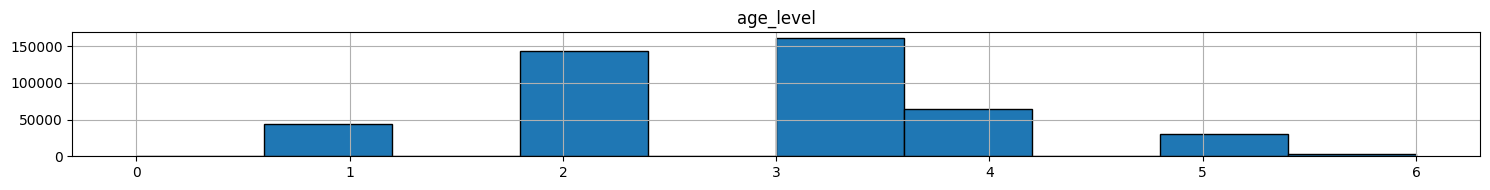

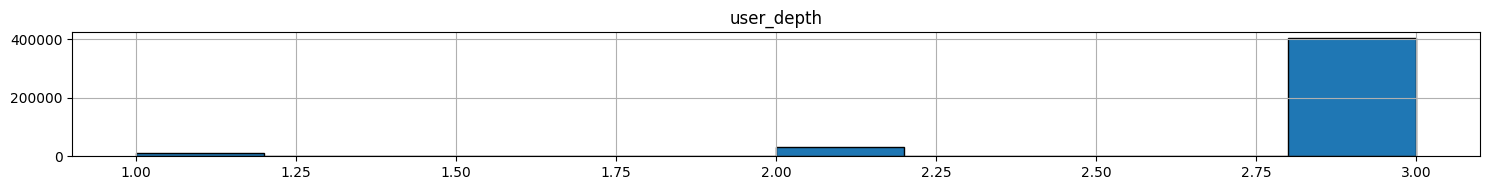

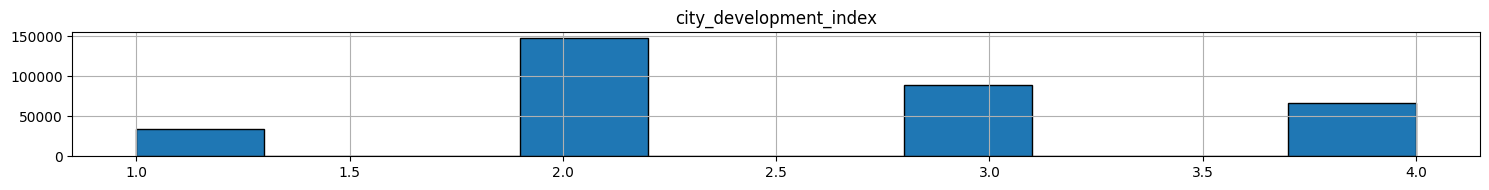

In [183]:
parameters = ["gender", "age_level", "user_depth", "city_development_index"]
num_parameter = len(parameters)

print("\n*** Printing Nan counts for PRODUCT PARAMETERS:")
for i in range(num_parameter):
    print(f"NaN counts for '{parameters[i]}': ", dataset[parameters[i]].isna().sum())

dataset["age_level"] = pd.to_numeric(dataset["age_level"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())
dataset["user_depth"] = pd.to_numeric(dataset["user_depth"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())
dataset["city_development_index"] = pd.to_numeric(dataset["city_development_index"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())

## Product
print("\n*** Printing value counts for PRODUCT PARAMETERS:")
for i in range(num_parameter):
    value_counts = dataset[parameters[i]].value_counts()
    print(f"Value counts: {value_counts}\n")

## Plot Histogram
for i in range(num_parameter):
    axs = dataset[parameters[i]].sort_values().hist(figsize=(15, 2), edgecolor='black')
    axs.set_title(parameters[i])
    axs.autoscale()

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


          session_id       user_id    campaign_id     webpage_id  \
count  463291.000000  4.632910e+05  463291.000000  463291.000000   
mean   285544.090725  5.460497e+05  308474.540069   29685.878994   
std    168577.345887  3.294625e+05  126517.101294   21542.053106   
min         2.000000  4.000000e+00   82320.000000    1734.000000   
25%    137856.500000  2.578550e+05  118601.000000   13787.000000   
50%    285429.000000  5.318010e+05  359520.000000   13787.000000   
75%    435535.500000  8.278490e+05  405490.000000   53587.000000   
max    595812.000000  1.141729e+06  414149.000000   60305.000000   

       product_category_1  product_category_2  user_group_id  age_level  \
count       463291.000000        97437.000000  445048.000000   445048.0   
mean             3.072427       162753.345105       3.477396   2.782266   
std              1.304233        78743.742720       2.412889   1.069701   
min              1.000000        18595.000000       0.000000        0.0   
25%         

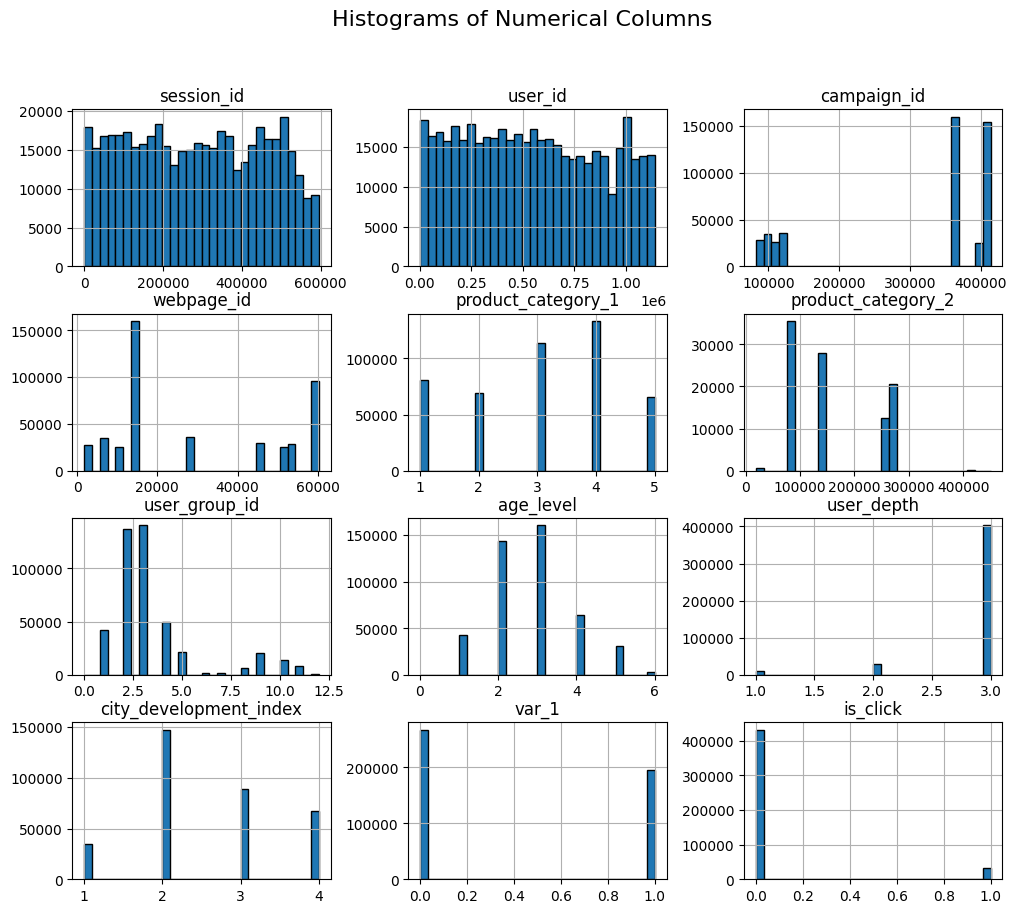

In [159]:
# Visualize dataset
print(dataset.describe())

# Histograms for all numerical columns
dataset.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

In [160]:
# Clean dataset

## Handle missing values
print(dataset.isna().sum())

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64
